**Project 1**

Work in groups of 2-5. Prepare ~10 slides where one slide describes your setup and analysis, main results, challenges/suprises and take-home message.

Everyone should do the first part of the project. You can then choose from one of the three themes for part 2.

For the first part of the project, you will be working on a high-dimensional data from the cancer genom atlas (TCGA). The data matrices contain gene expression (relates to how much of a gene product (protein) is being produced) for 2000 randomly selected genes over 2887 cancer samples. There are 6 types of cancers in this data set. You don't need to know any bio for the project - just think of this as a 6 class data set with 2000 features.

You will notice that the classes are quite imbalanced. There are a lot of breast cancer samples and very few uterine samples, etc.

All of the project themes aim at you exploring how to make a method "crash" in some way - meaning that you illustrate when a particular method or approach would be a bad choice, or simple a situation when things might not work out as hoped for.

For all tasks, you have to repeat the exercise in order to be able to draw conclusions. That is, one single run of a data analysis task or simulation has very limited information so repeat a few times to ensure you are not drawing conclusions based on a random "fluke".

**Part 1 - Dimension reduction and predictive modeling**

*Everyone should do this task.*

High-dimensional data tend to be "data hungry". For some methods, high-dimensionality can results in a large number of parameters having to be estimated and as a consequence you might high estimation variance. It is therefore quite common to try to reduce the dimensionality of the problem prior to modeling. (An alternative to this is filtering where you remove a (possibly large) subset of features before modeling.

In class we have so-far discussed a linear dimension reduction technique, PCA and some basic filtering based on e.g. variance, t or F-tests.

You should explore at least 3 different classifiers of different character, from flexible to rigid (e.g. small k to large k in k-nearest neighbors). Feel free to try any other classifier you like as long as you explain if they are flexible or rigid.

1. Perform cross-validation to select the number of principal components that optimizing predictive performance.
2. Perform cross-validation to select the number features (genes) that optimizing predictive performance.
3. Demonstrate the optimism of training by comparing the difference between training error, cross-validation error after selection of optimal PCs or features, and test error performance. Discuss the difference for the fleixble and rigid classifiers in terms of optimism.
4. Repeat the above for 3 different size training sets and discuss the results.

*Voluntary - something to think about*

1. Can you construct a data set where PCA dimension reduction should improve classification performance?
2. Can you construct a data set where PCA dimension reduction should reduce classification performance?

In [2]:
import pandas as pd

file_path_data = "TCGAdata.txt"
file_path_labels = "TCGAlabels.txt"

df_data = pd.read_csv(
    file_path_data, 
    delim_whitespace=True,  # Use whitespace as the delimiter
    header=0,               # Use the first line as the header
    quotechar='"'           # Specify the quote character used
)

df_labels = pd.read_csv(
    file_path_labels, 
    delim_whitespace=True,  
    header=0,               
    quotechar='"'           
)

df = pd.merge(df_data, df_labels, left_index=True, right_index=True, how='left')

df.head(1)
print(df.shape)

(2887, 2001)


In [29]:
from sklearn.preprocessing import StandardScaler

# Load dataset
# Assuming your dataset is in a CSV file named 'data.csv'
# Replace 'data.csv' with the actual path to your dataset file
#df = pd.read_csv('data.csv', skiprows=1)

# Assuming the last column is the label
features = df.iloc[:, :-1]  # Select only feature columns
labels = df.iloc[:, -1]  # Select the label column
print(df.shape)

# Centering and normalization
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
#print(features_scaled.mean())
#print(features.mean())

# Convert the normalized features back to a DataFrame
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

# Reattach the labels to the features DataFrame
final_df = pd.concat([features_scaled_df, labels.reset_index(drop=True)], axis=1)

# Show the first few rows of the final, normalized dataset
print(final_df.head())

(2887, 2001)
-7.875776773232839e-20
         V1        V2        V3        V4        V5        V6        V7  \
0 -1.715940  1.217289 -0.778058 -0.449348 -0.643175  1.626182  1.326347   
1 -4.888000 -0.103819 -0.778058 -1.891912 -0.949149 -0.077379 -0.108216   
2 -1.253872 -0.035045 -0.778058  0.010001 -0.108216  0.463993  0.623136   
3 -0.853313 -0.372010 -0.778058 -0.316451 -0.365051 -0.107704 -1.329117   
4  2.059144  0.439639 -0.778058 -0.288603  0.668848 -1.003692  0.080642   

         V8         V9       V10  ...     V1992     V1993     V1994     V1995  \
0  0.689276  14.728014 -0.169078  ... -0.569072  0.197018 -1.202524 -2.034733   
1 -0.360422  -0.123994 -0.169078  ... -0.445065  1.678946 -1.202524 -3.909225   
2 -1.125541   9.050189 -0.169078  ... -0.567281  0.036671 -1.202524 -0.363149   
3  0.273341  -0.123994 -0.169078  ... -0.935919 -0.663160 -1.202524  0.720660   
4 -0.796653  -0.123994 -0.169078  ... -0.048958  0.438989 -0.364075 -0.696148   

      V1996     V1997     

In [4]:
from sklearn.model_selection import train_test_split

X = final_df.iloc[:, :-1] #features
y = final_df.iloc[:, -1] #Labels

#Split data into 80-20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42 )

print(X_train.shape)

(2309, 2000)


In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA().fit(X_train)

#To get the principal components, the 'transform' method of the PCA object can be used
principal_components_pca = pca.transform(X_train)

print(principal_components_pca.shape)

(2309, 2000)


(-1.0, 50.0)

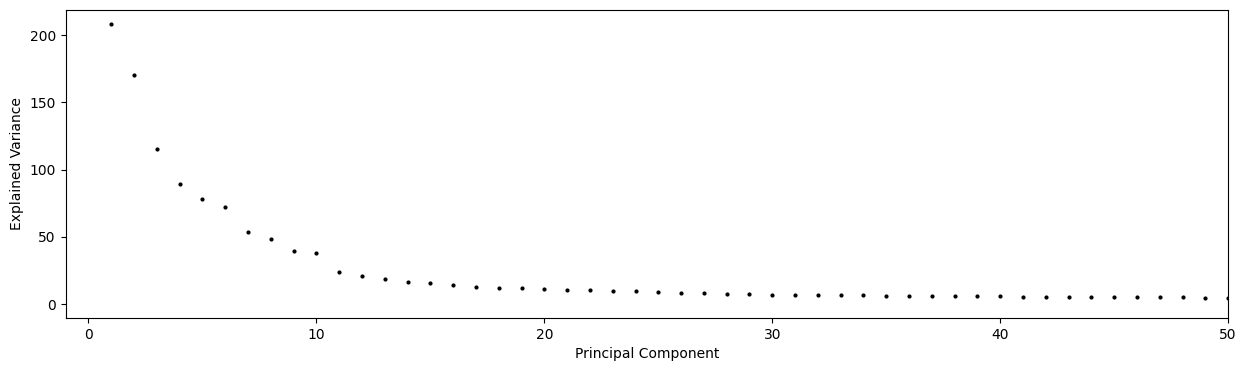

In [19]:
fig = plt.figure(figsize=(15, 4))
ax = fig.gca()

ax.plot(np.arange(1, len(pca.explained_variance_) + 1), pca.explained_variance_, 'ok', markersize=2)
#ax.axvline(6, linestyle="dashed", color="red", linewidth=1)

ax.set_xlabel("Principal Component")
ax.set_ylabel("Explained Variance")
ax.set_xlim([-1,50])

In [35]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline
#from tqdm from tqdm 

# Assume X_train and y_train are already defined

# Define the cross-validation and the range of components to test
kf = KFold(n_splits=5, shuffle=True, random_state=42)
component_range = range(1, 20)  # Up to 50 components, for example

# Store average scores for each number of components
scores = []

for n_components in component_range:
    # Create a PCA object with the current number of components
    pca = PCA(n_components=n_components)
    
    # Create a logistic regression classifier
    classifier = LogisticRegression(max_iter=10000)  # Increase max_iter

    
    # Make a pipeline combining PCA and the classifier
    pipeline = make_pipeline(pca, classifier)

    
    # Perform cross-validation and store the average score
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=kf, verbose = 1)
    scores.append(np.mean(cv_scores))

    print(n_components)

# Find the number of components with the highest average score
optimal_components = component_range[np.argmax(scores)]

print(f"Optimal number of components: {optimal_components}")


1
2
3
4
5
6
7
8
9
10
11
Optimal number of components: 11
